In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
import ast
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
def flatten_dict(dd, separator='_', prefix=''):
    return { prefix + separator + k if prefix else k : v
             for kk, vv in dd.items()
             for k, v in flatten_dict(vv, separator, kk).items()
             } if isinstance(dd, dict) else { prefix : dd }

In [5]:
# reading file

def get_data(filename: str):
    with open(filename, 'r') as fin:
        data = fin.readlines()
    return data

In [6]:
# converting each line to dict and then list of dicts to pd dataframe

def data_to_dataframe(lines_data: list, switch = False):
    temp_lst = []
    for line in lines_data:
        if not switch:
            temp_dict = ast.literal_eval(line)
            flat_temp_dict = flatten_dict(temp_dict)
        else:
            temp_dict = json.loads(line)
            flat_temp_dict = flatten_dict(temp_dict)
        temp_lst.append(flat_temp_dict)
    df = pd.DataFrame.from_dict(temp_lst)
    return df

In [7]:
# reading metadata

data_meta = get_data("/home/chitransh/Documents/personal/tf_interview_meta_FASHION.json")
df_meta = data_to_dataframe(data_meta)

In [8]:
df_meta.head()

,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,...,tech1_Item Package Quantity,tech1_Batteries Included?,tech1_Batteries Required?,tech1_Material,tech1_Style,tech1_Number Of Pieces,tech1_Special Features,tech1_Included Components,tech1_Discontinued by manufacturer,tech1_Closure
0,"Slime Time Fall Fest [With CDROM and Collector Cards and Neutron Balls, Incredi-Ball and Glow Stick Necklace, Paper Fram",Group Publishing (CO),"[Product Dimensions:\n \n8.7 x 3.6 x 11.4 inches, Shipping Weight:\n \n2.4 pounds]","13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL._US40_.jpg],[https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL.jpg],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men's accessories alloy fittings magnet buckle bracelet jewelry,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,"[https://images-na.ssl-images-amazon.com/images/I/41BCH7-4vHL._US40_.jpg, https://images-na.ssl-images-amazon.com/images/I/41FpbB--SoL._US40_.jpg, https://images-na.ssl-images-amazon.com/images/I/51twQYJo0NL._US40_.jpg]","[https://images-na.ssl-images-amazon.com/images/I/41BCH7-4vHL.jpg, https://images-na.ssl-images-amazon.com/images/I/41FpbB--SoL.jpg, https://images-na.ssl-images-amazon.com/images/I/51twQYJo0NL.jpg]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,"[Package Dimensions:\n \n8.5 x 5.5 x 0.4 inches, Shipping Weight:\n \n6.1 ounces]","19,308,073inClothing,ShoesJewelry(",5 star,1940280001,"[https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL._SR38,50_.jpg, https://images-na.ssl-images-amazon.com/images/I/31N2zBaedSL._SR38,50_.jpg]","[https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL.jpg, https://images-na.ssl-images-amazon.com/images/I/31N2zBaedSL.jpg]","[For the professional or amateur magician. Routines include: The Thought Transmitter (An accidental USAF experiment that became a hit at the Denver Playboy Club and continues through today!), Three Card Match (The trick that fooled Dai Vernon), Numbo-Jumbo (A stack of 85 cards containing random 2 and 4 digit numbers is apparently memorized), The Binary Box (Light the light even rocket scientists could not figure it out!), Kryptonite! (Anyone can be a superhero and save the day!), Laundry Quandary (Where did the missing sock go?), Comedy Birthday Cake Production Routine (The funniest and most memorable part of any kids birthday party.), Dazzling Divination! (A pocket mentalism effect that is always ready to go. If you do safety magic, heres a strong effect that packs real small.) and Sweet Sixteen (A great commercial effect that really gets your customers message across.)\n\nIncluded in his latest book is a bonus chapter entitled, Putting a Little Magic in your Life and Business. A book in itself! Not just for magicians, but for anyone who wants to add a little magic to their life, and stand out amongst the crowd. Learn ways to get known and not forgotten! By setting up your magical reputation, your business card wont be stuck in the middle of a pile YOU can control it to the top!]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,"[Package Dimensions:\n \n8.3 x 5.5 x 0.3 inches, Shipping Weight:\n \n5.6 ounces]","19,734,184inClothing,ShoesJewelry(",5 star,1940735033,"[https://images-na.ssl-images-amazon.com/images/I/41VHFlSGjoL._SR38,50_.jpg]",[https://images-na.ssl-images-amazon.com/images/I/41VHFlSGjoL.jpg],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aether & Empire #1 - 2016 First Printing Comic Book Special Edition - Rare! - Blue Juice Comics,NaN,"[Package Dimensions:\n \n10.5 x 6.5 x 0.2 inches, Shipping Weight:\n \n6.4 ounces (View shipping rates and policies)]","10,558,646inClothing,Shoesamp;Jewelry(",5 star,1940967805,"[https://images-na.ssl-im

In [9]:
# reading review data

data_review = get_data("/home/chitransh/Documents/personal/tf_interview_review_FASHION.json")
df_review = data_to_dataframe(data_review, switch=True)

In [10]:
df_review.head()

,overall,verified,reviewTime,reviewerID,asin,style_Color:,reviewerName,reviewText,summary,unixReviewTime,...,style_Team Name:,style_Style Name:,style_Format:,style_Package Quantity:,style_Material:,style_Item Display Length:,style_Gem Type:,style_Item Package Quantity:,style_Scent Name:,style_Shape:
0,1.0,True,"07 27, 2017",A19OTBIPAMJUU1,B00007GDFV,Black,Constance J Tomazic,Don't like it. It will not hold my cigarettes. Not long enough.,One Star,1501113600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,True,"07 16, 2017",A3IT0MD9QUFZEK,B00007GDFV,Black,Amazon Customer,love,Four Stars,1500163200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,True,"07 2, 2017",A1IER9LE7FBJ95,B00007GDFV,Black,Angel3954,Wonderful item. I have purchased several of these. They last forever unless you lose them. I am happy with my purchase Buxton is made to last.,Made to last,1498953600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,"06 27, 2017",A3DZQ7TB4ZUWKG,B00007GDFV,Black,yolanda hernandez,"I just love it! I think this is my six or seven case from Buxton. They are very stylish, durable and proper if you don't want your cigarette packet crushed inside your purse",LOVE IT!,1498521600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,True,"06 22, 2017",A199RALD1NLRC1,B00007GDFV,Black,Joni,made well but will only hold a small pack of ciggs I don't smoke I use this as a tip holder for work I bought a different one last year but it is falling apart so I replaced it with this brand. The zipper compartment won't hold anything its to small,made well but will only hold a small pack of ...,1498089600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(df_meta.dtypes)

title                                 object
brand                                 object
feature                               object
rank                                  object
date                                  object
asin                                  object
imageURL                              object
imageURLHighRes                       object
description                           object
price                                 object
also_view                             object
also_buy                              object
fit                                   object
details                               object
similar_item                          object
tech1_Brand Name                      object
tech1_Item Weight                     object
tech1_Product Dimensions              object
tech1_California residents            object
tech1_Item model number               object
tech1_Color                           object
tech1_Cover Material                  object
tech1_Mate

In [12]:
print(df_review.dtypes)

overall                         float64
verified                           bool
reviewTime                       object
reviewerID                       object
asin                             object
style_Color:                     object
reviewerName                     object
reviewText                       object
summary                          object
unixReviewTime                    int64
vote                             object
style_Size:                      object
image                            object
style_Metal Type:                object
style_Size Name:                 object
style_Style:                     object
style_Length:                    object
style_Team Name:                 object
style_Style Name:                object
style_Format:                    object
style_Package Quantity:          object
style_Material:                  object
style_Item Display Length:       object
style_Gem Type:                  object
style_Item Package Quantity:     object


## Conclusion 1: 

### We don't need product metadata as it doesn't help in reviewing process. We are looking into the ratings based on the reviews given. 

### Hence, we will only be exploring review data

In [13]:
# our label is overall
# we don't need review time, unixreviewtime and styles data. We will select only specific data to observer

df_processed = df_review[["reviewerID", "asin", "overall", "verified", "reviewText", "summary", "vote", "image"]]

In [14]:
# Checking null values in all the columns

100 * df_processed.isnull().sum(axis = 0)/df_processed.shape[0]

reviewerID     0.000000
asin           0.000000
overall        0.000000
verified       0.000000
reviewText     0.139540
summary        0.060320
vote          90.957827
image         96.739870
dtype: float64

## Conclusion 2:

### Vote and Image data have over 90% false. We cannot use them. Review Text is important to derive ratings. Summary can also help us in identifying polarity of review. So, we won't drop them. Given the size of data we can safely drop the rows with no records for these columns

In [15]:
# Dropping vote and image column

df_processed.drop(["vote", "image"], inplace=True, axis=1)

/home/chitransh/Documents/personal/fashion_review/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df_processed.shape

(883615, 6)

In [17]:
# Dropping null records

df_processed.dropna(inplace=True)

/home/chitransh/Documents/personal/fashion_review/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df_processed.shape

(881879, 6)

In [19]:
df_processed.head()

,reviewerID,asin,overall,verified,reviewText,summary
0,A19OTBIPAMJUU1,B00007GDFV,1.0,True,Don't like it. It will not hold my cigarettes. Not long enough.,One Star
1,A3IT0MD9QUFZEK,B00007GDFV,4.0,True,love,Four Stars
2,A1IER9LE7FBJ95,B00007GDFV,4.0,True,Wonderful item. I have purchased several of these. They last forever unless you lose them. I am happy with my purchase Buxton is made to last.,Made to last
3,A3DZQ7TB4ZUWKG,B00007GDFV,5.0,True,"I just love it! I think this is my six or seven case from Buxton. They are very stylish, durable and proper if you don't want your cigarette packet crushed inside your purse",LOVE IT!
4,A199RALD1NLRC1,B00007GDFV,4.0,True,made well but will only hold a small pack of ciggs I don't smoke I use this as a tip holder for work I bought a different one last year but it is falling apart so I replaced it with this brand. The zipper compartment won't hold anything its to small,made well but will only hold a small pack of ...


<AxesSubplot:>

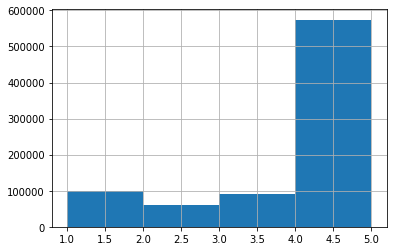

In [20]:
df_processed[df_processed.verified==True]['overall'].hist(bins=[1,2,3,4,5])

<AxesSubplot:>

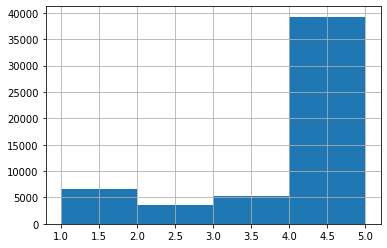

In [21]:
df_processed[df_processed.verified==False]['overall'].hist(bins=[1,2,3,4,5])

In [22]:
# Combining reviewText and Summary to reduce feature complexity and dropping verified column as it holds no value

df_processed.drop('verified', inplace=True, axis=1)


/home/chitransh/Documents/personal/fashion_review/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
df_processed['review'] = df_processed['reviewText'] + ' ' + df_processed['summary']

/home/chitransh/Documents/personal/fashion_review/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_processed.drop(['reviewText', 'summary'], axis=1, inplace=True)

In [25]:
df_processed.head()

,reviewerID,asin,overall,review
0,A19OTBIPAMJUU1,B00007GDFV,1.0,Don't like it. It will not hold my cigarettes. Not long enough. One Star
1,A3IT0MD9QUFZEK,B00007GDFV,4.0,love Four Stars
2,A1IER9LE7FBJ95,B00007GDFV,4.0,Wonderful item. I have purchased several of these. They last forever unless you lose them. I am happy with my purchase Buxton is made to last. Made to last
3,A3DZQ7TB4ZUWKG,B00007GDFV,5.0,"I just love it! I think this is my six or seven case from Buxton. They are very stylish, durable and proper if you don't want your cigarette packet crushed inside your purse LOVE IT!"
4,A199RALD1NLRC1,B00007GDFV,4.0,made well but will only hold a small pack of ciggs I don't smoke I use this as a tip holder for work I bought a different one last year but it is falling apart so I replaced it with this brand. The zipper compartment won't hold anything its to small made well but will only hold a small pack of ...


In [26]:
df_processed.loc[:10000, ['reviewerID', 'asin']].to_csv("identifier.csv", index=False)
df_processed.loc[:10000, ['review', 'overall']].to_csv("data.csv", index=False)

In [27]:
df_processed.loc[:10000, ['reviewerID', 'asin']].shape

(9987, 2)

## -------------DATA PROCESSING ENDS HERE----------------


### SCRATCH WORK AHEAD

In [ ]:
# # separating labels
# df_Y = df_processed.overall
# df_X = df_processed.drop("overall", axis=1)

In [39]:
# # saving a portion of data for training considering machine limitations

# df_X.loc[:10000, ['reviewerID', 'asin']].to_csv("identifier.csv", index=False)
# df_X.loc[:10000, ['review']].to_csv("train_data.csv", index=False)
# df_Y[:10001].to_csv("train_lable.csv", index=False)

In [20]:
# print(df_X.shape, df_Y.shape)

(883615, 5) (883615,)


In [36]:
# df_X.loc[:10000, ['reviewerID', 'asin']].shape

(10001, 2)

In [38]:
# df_X.loc[:10000, ['review']].shape

(10001, 1)

In [40]:
# df_Y[:10001].shape

(10001,)

In [22]:
# df_Y.head()

0    1.0
1    4.0
2    4.0
3    5.0
4    4.0
Name: overall, dtype: float64

In [133]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

import nltk

In [134]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/chitransh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/chitransh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [125]:
import re

In [123]:
df_X.review = df_X.review.str.lower()

In [124]:
df_X.head()

,reviewerID,asin,review
0,A19OTBIPAMJUU1,B00007GDFV,don't like it. it will not hold my cigarettes. not long enough. one star
1,A3IT0MD9QUFZEK,B00007GDFV,love four stars
2,A1IER9LE7FBJ95,B00007GDFV,wonderful item. i have purchased several of these. they last forever unless you lose them. i am happy with my purchase buxton is made to last. made to last
3,A3DZQ7TB4ZUWKG,B00007GDFV,"i just love it! i think this is my six or seven case from buxton. they are very stylish, durable and proper if you don't want your cigarette packet crushed inside your purse love it!"
4,A199RALD1NLRC1,B00007GDFV,made well but will only hold a small pack of ciggs i don't smoke i use this as a tip holder for work i bought a different one last year but it is falling apart so i replaced it with this brand. the zipper compartment won't hold anything its to small made well but will only hold a small pack of ...


In [140]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [141]:
stoplist = stopwords.words('english') + list(punctuation)

In [1]:
df_X.shape

NameError: name 'df_X' is not defined

In [ ]:
df_X['tokenized_review'] = df_X.review.apply(lambda x: nltk.word_tokenize(x))